In [109]:
import numpy as np
import os
import matplotlib.pyplot as plt
import jpegio
%matplotlib inline

In [110]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF100_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_100'

In [111]:
def calc_residual(stego, cover):
    residual_y =  np.abs(stego.quant_tables[0].astype(np.int16) - cover.quant_tables[0].astype(np.int16)).astype(np.uint8)
    residual_CbCr =  np.abs(stego.quant_tables[0].astype(np.int16) - cover.quant_tables[0].astype(np.int16)).astype(np.uint8)
    return residual_y, residual_CbCr

In [148]:
def show_img(cover_path: str, stego_path: str, count: int, multiple: int):
    fig = plt.figure(figsize=(8, 25))

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:] == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    i=0
    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_y, residual_CbCr = calc_residual(stego, cover)
        residual_y *= multiple
        residual_CbCr *= multiple

        # fig.suptitle('Residual Image for Y-channel      Residual Image for CbCr-channel')

        ax = fig.add_subplot(10, 2, i+1)

        ax.imshow(residual_y, cmap = 'gray')
        ax.title.set_text('Residual Image for Y-channel')

        ax = fig.add_subplot(10, 2, i+2)
        ax.imshow(residual_CbCr, cmap = 'gray')
        ax.title.set_text('Residual Image for CbCr-channel')

        fig.tight_layout()
        i += 2

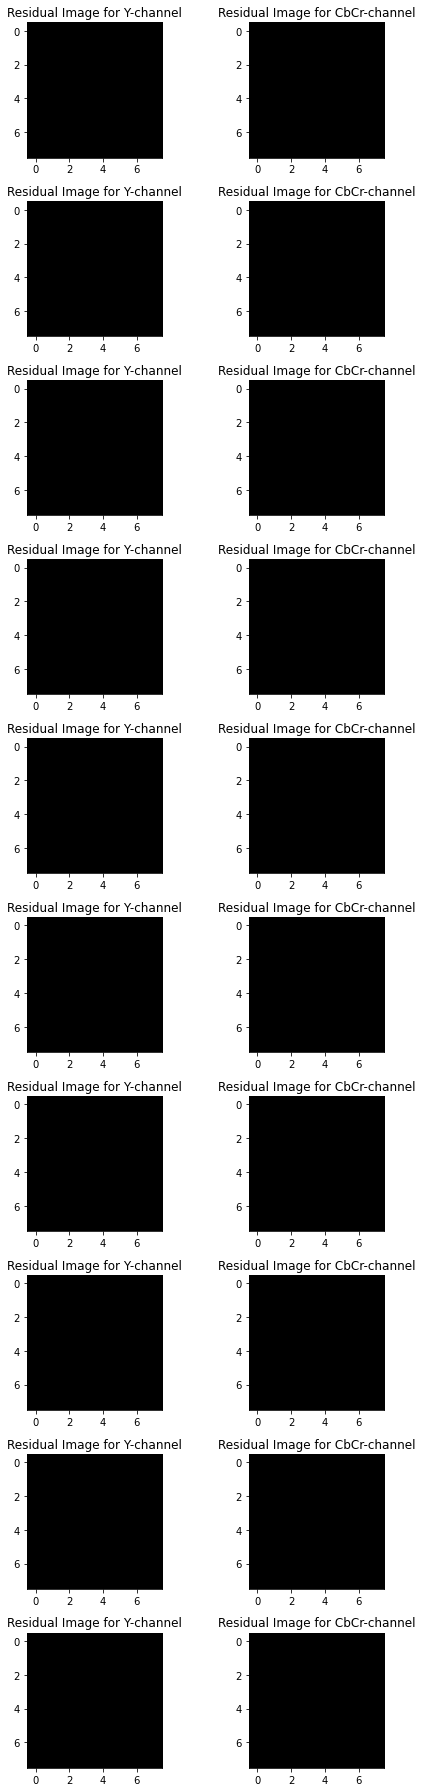

In [149]:
show_img(cover_path, stego_path, 10, 1)